In [32]:
using Distributions
using Plots
default(fmt=:png)

function pvalue_central(k, n, p)
    bin = Binomial(n, p)
    min(1, 2cdf(bin, k), 2ccdf(bin, k-1))
end

function pvalue_score(k, n, p)
    bin = Binomial(n, p)
    z = (k - mean(bin)) / std(bin)
    2ccdf(Normal(), abs(z))
end

function pvalue_normal_approx_ge(k, n, p)
    bin = Binomial(n, p)
    normal = Normal(mean(bin), std(bin))
    cdf(normal, k)
end

function posterior_probability_ge(k, n, p; a=1, b=1)
    posterior = Beta(k+a, n-k+b)
    ccdf(posterior, p)
end

r(x; sigdigits=3) = round(x; sigdigits)

r (generic function with 1 method)

In [29]:
k, n, p = 90, 200, 0.5
@show pvalue_normal_approx_ge(k, n, p)
@show posterior_probability_ge(k, n, p);

pvalue_normal_approx_ge(k, n, p) = 0.07864960352514257
posterior_probability_ge(k, n, p) = 0.07908267260047049


In [34]:
using Distributions
r(x; sigdigits=3) = round(x; sigdigits)

k, n, p = 90, 200, 0.5
@show k, n, p

# 二項分布の正規分布モデルでの仮説 p≥0.5 の片側P値
@show bin = Binomial(n, p)
@show cdf(Normal(mean(bin), std(bin)), k) |> r

# 二項分布と平坦事前分布での仮説 p≥0.5 の事後確率
@show ccdf(Beta(k+1, n-k+1), p) |> r;

(k, n, p) = (90, 200, 0.5)
bin = Binomial(n, p) = Binomial{Float64}(n=200, p=0.5)
cdf(Normal(mean(bin), std(bin)), k) |> r = 0.0786
ccdf(Beta(k + 1, (n - k) + 1), p) |> r = 0.0791


In [39]:
using Distributions
r(x; sigdigits=3) = round(x; sigdigits)

k, n, p = 90, 200, 0.5
@show k, n, p

# 二項分布の正規分布モデルでの仮説 p≥0.5 の片側P値
@show bin = Binomial(n, p)
@show cdf(Normal(mean(bin), std(bin)), k) |> r

# 二項分布と事前分布Beta(8,4)での仮説 p≥0.5 の事後確率
@show ccdf(Beta(k+8, n-k+4), p) |> r;

(k, n, p) = (90, 200, 0.5)
bin = Binomial(n, p) = Binomial{Float64}(n=200, p=0.5)
cdf(Normal(mean(bin), std(bin)), k) |> r = 0.0786
ccdf(Beta(k + 8, (n - k) + 4), p) |> r = 0.135


In [60]:
using Distributions
r(x; sigdigits=3) = round(x; sigdigits)

k, n, p = 771, 1600, 0.5
@show k, n, p

# 二項分布の正規分布モデルでの仮説 p≥0.5 の片側P値
@show bin = Binomial(n, p)
@show cdf(Normal(mean(bin), std(bin)), k) |> r

# 二項分布と事前分布Beta(8,4)での仮説 p≥0.5 の事後確率
@show ccdf(Beta(k+8, n-k+4), p) |> r;

(k, n, p) = (771, 1600, 0.5)
bin = Binomial(n, p) = Binomial{Float64}(n=1600, p=0.5)
cdf(Normal(mean(bin), std(bin)), k) |> r = 0.0735
ccdf(Beta(k + 8, (n - k) + 4), p) |> r = 0.0892


In [66]:
using Distributions
r(x; sigdigits=3) = round(x; sigdigits)

k, n, p = 3142, 6400, 0.5
@show k, n, p

# 二項分布の正規分布モデルでの仮説 p≥0.5 の片側P値
@show bin = Binomial(n, p)
@show cdf(Normal(mean(bin), std(bin)), k) |> r

# 二項分布と事前分布Beta(8,4)での仮説 p≥0.5 の事後確率
@show ccdf(Beta(k+8, n-k+4), p) |> r;

(k, n, p) = (3142, 6400, 0.5)
bin = Binomial(n, p) = Binomial{Float64}(n=6400, p=0.5)
cdf(Normal(mean(bin), std(bin)), k) |> r = 0.0735
ccdf(Beta(k + 8, (n - k) + 4), p) |> r = 0.0809


pvalue_central(k, n, p1) |> r = 1.0
pvalue_central(k, n, p2) |> r = 0.72
pvalue_central(k, n, p3) |> r = 0.0044

pvalue_score(k, n, p1) |> r = 0.93
pvalue_score(k, n, p2) |> r = 0.42
pvalue_score(k, n, p3) |> r = 3.2e-101


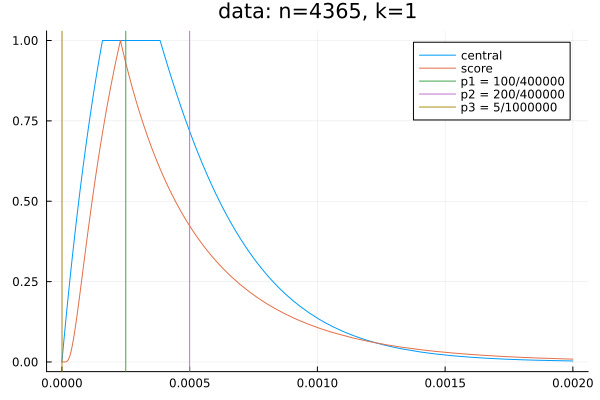

In [13]:
p1 = 100/400_000
p2 = 200/400_000
p3 = 5/1000_1000
n = 4365
k = 1

@show pvalue_central(k, n, p1) |> r
@show pvalue_central(k, n, p2) |> r
@show pvalue_central(k, n, p3) |> r
println()
@show pvalue_score(k, n, p1) |> r
@show pvalue_score(k, n, p2) |> r
@show pvalue_score(k, n, p3) |> r

plot()
plot!(p -> pvalue_central(k, n, p), 0, 0.002; label="central")
plot!(p -> pvalue_score(k, n, p), 0, 0.002; label="score")
vline!([p1]; label="p1 = 100/400000")
vline!([p2]; label="p2 = 200/400000")
vline!([p3]; label="p3 = 5/1000000")
title!("data: n=$n, k=$k")

In [4]:
using Distributions
using Plots
default(fmt=:png)

In [9]:
@show n = 20
dist0 = Normal(0, 1/sqrt(n))
@show y = quantile(dist0, 0.975)
dist1 = Normal(0 + y, sqrt(1/n + 0.0))
@show p = 2ccdf(dist0, y)
@show SSB = -exp(1)*p*log(p)
@show BF01 = exp(logpdf(dist0, y) - logpdf(dist1, y))
;

n = 20 = 20
y = quantile(dist0, 0.975) = 0.43826127028829154
p = 2 * ccdf(dist0, y) = 0.04999999999999959
SSB = -(exp(1)) * p * log(p) = 0.4071622301065036
BF01 = exp(logpdf(dist0, y) - logpdf(dist1, y)) = 0.1465000644860832


In [70]:
using Distributions
using Plots
default(fmt=:png)
safediv(x, y) = x == 0 ? zero(x/y) : x/y

safediv (generic function with 1 method)

In [68]:
function pvalue_score(k, n, p)
    0 ≤ p ≤ 1 || return zero(p)
    bin = Binomial(n, p)
    z = safediv(k - mean(bin), std(bin))
    2ccdf(Normal(), abs(z))
end

function confint_score(k, n, α = 0.05)
    z = cquantile(Normal(), α/2)
    p̂ = k/n
    sehat² = p̂ * (1 - p̂) / n
    a, b = 1 + z^2/n, p̂ + z^2/(2n)
    sqrtD = z * √(sehat² + z^2/(4n^2))
    p_L = (b - sqrtD) / a
    p_U = (b + sqrtD) / a
    [p_L, p_U]
end

confint_score (generic function with 2 methods)

confint_score(k, n, 0.05) = [0.14547724486760402, 0.518972818353524]
confint_score(k, n, 0.5) = [0.235961850289739, 0.37293451416154066]
confint_score(k, n, 1.0) = [0.3, 0.3]


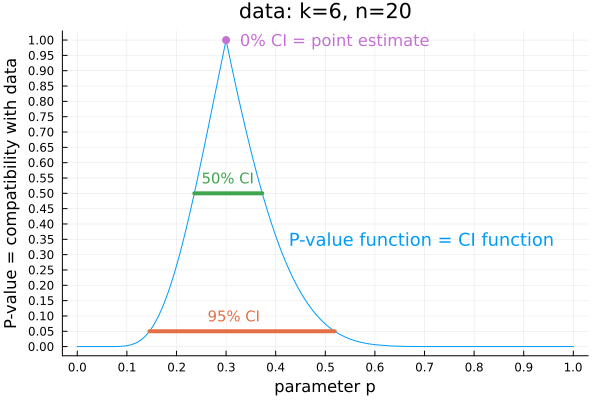

In [105]:
k, n = 6, 20
plot(p -> pvalue_score(k, n, p), 0, 1; label="")
plot!(@show(confint_score(k, n, 0.05)), fill(0.05, 2); label="", lw=4, c=2)
plot!(@show(confint_score(k, n, 0.50)), fill(0.50, 2); label="", lw=4, c=3)
plot!(@show(confint_score(k, n, 1.00)), fill(1.00, 2); label="", lw=8, c=4)
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
plot!(xguide="parameter p", yguide="P-value = compatibility with data")
title!("data: k=$k, n=$n")
annotate!(0.430, 0.35, ("P-value function = CI function", 12, :left, palette(:default)[1]))
annotate!(0.315, 0.10, ("95% CI", 10, :center, palette(:default)[2]))
annotate!(0.303, 0.55, ("50% CI", 10, :center, palette(:default)[3]))
annotate!(0.330, 1.00, ("0% CI = point estimate", 11, :left, palette(:default)[4]))

(k, n) = (9, 30)
k / n = 0.3
pvalue_score(k, n, 0.5) = 0.028459736916310572
pvalue_score(k, n, 0.3) = 1.0
confint_score(k, n, 0.05) = [0.16664748268243768, 0.4787578745871499]


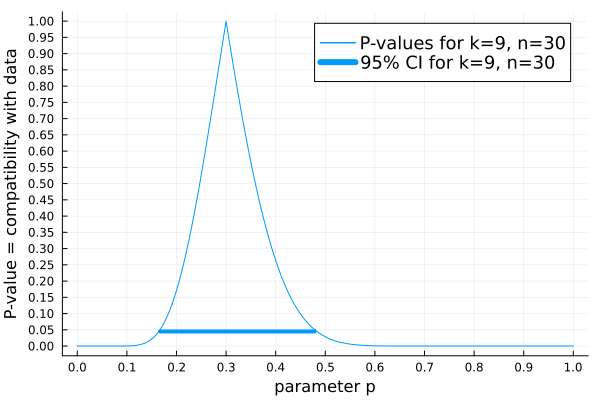

In [137]:
plot()
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
plot!(xguide="parameter p", yguide="P-value = compatibility with data")
plot!(legendfontsize=12)

k, n = 9, 30
@show k, n
@show k/n
@show pvalue_score(k, n, 0.5)
@show pvalue_score(k, n, 0.3)
plot!(p -> pvalue_score(k, n, p), 0, 1; label="P-values for k=$k, n=$n", c=1)
plot!(@show(confint_score(k, n, 0.05)), fill(0.045, 2); label="95% CI for k=$k, n=$n", lw=4, c=1)

(k, n) = (15, 40)
k / n = 0.375
pvalue_score(k, n, 0.5) = 0.11384629800665803
pvalue_score(k, n, 0.3) = 0.30062298819690675
confint_score(k, n, 0.05) = [0.24222979167233244, 0.5296756086269894]


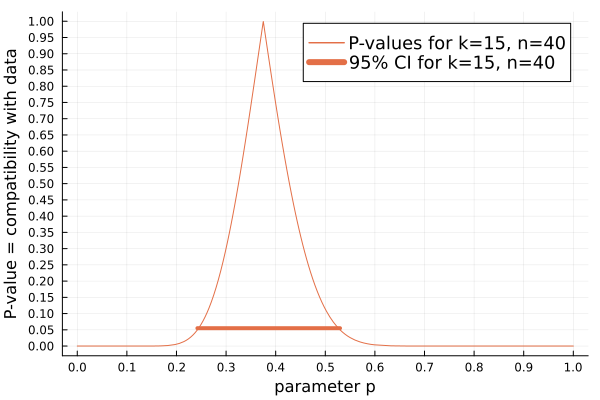

In [138]:
plot()
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
plot!(xguide="parameter p", yguide="P-value = compatibility with data")
plot!(legendfontsize=12)

k, n = 15, 40
@show k, n
@show k/n
@show pvalue_score(k, n, 0.5)
@show pvalue_score(k, n, 0.3)
plot!(p -> pvalue_score(k, n, p), 0, 1; label="P-values for k=$k, n=$n", c=2)
plot!(@show(confint_score(k, n, 0.05)), fill(0.055, 2); label="95% CI for k=$k, n=$n", lw=4, c=2)

(k, n) = (9, 30)
k / n = 0.3
pvalue_score(k, n, 0.5) = 0.028459736916310572
confint_score(k, n, 0.05) = [0.16664748268243768, 0.4787578745871499]
(k, n) = (15, 40)
k / n = 0.375
pvalue_score(k, n, 0.5) = 0.11384629800665803
pvalue_score(k, n, 0.3) = 0.30062298819690675
confint_score(k, n, 0.05) = [0.24222979167233244, 0.5296756086269894]


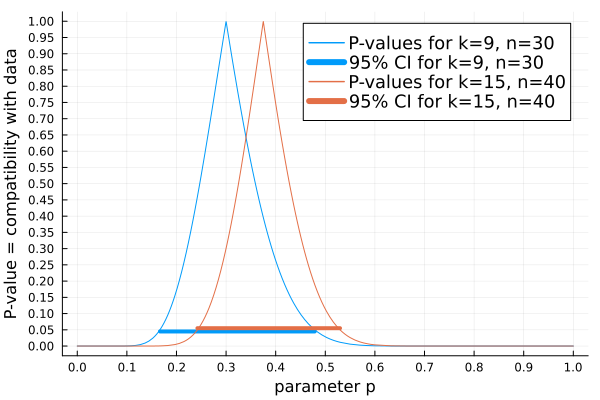

In [139]:
plot()
plot!(xtick=0:0.1:1, ytick=0:0.05:1)
plot!(xguide="parameter p", yguide="P-value = compatibility with data")
plot!(legendfontsize=12)

k, n = 9, 30
@show k, n
@show k/n
@show pvalue_score(k, n, 0.5)
plot!(p -> pvalue_score(k, n, p), 0, 1; label="P-values for k=$k, n=$n", c=1)
plot!(@show(confint_score(k, n, 0.05)), fill(0.045, 2); label="95% CI for k=$k, n=$n", lw=4, c=1)

k, n = 15, 40
@show k, n
@show k/n
@show pvalue_score(k, n, 0.5)
@show pvalue_score(k, n, 0.3)
plot!(p -> pvalue_score(k, n, p), 0, 1; label="P-values for k=$k, n=$n", c=2)
plot!(@show(confint_score(k, n, 0.05)), fill(0.055, 2); label="95% CI for k=$k, n=$n", lw=4, c=2)

(a, b, c, d) = (13, 7, 2, 8)
ORhat = (a * d) / (b * c) = 7.428571428571429
ORtilde = exp(o.minimizer) = 6.907948501897066
phicoeff = (a * d - b * c) / sqrt((a + b) * (c + d) * (a + c) * (b + d)) = 0.4242640687119285


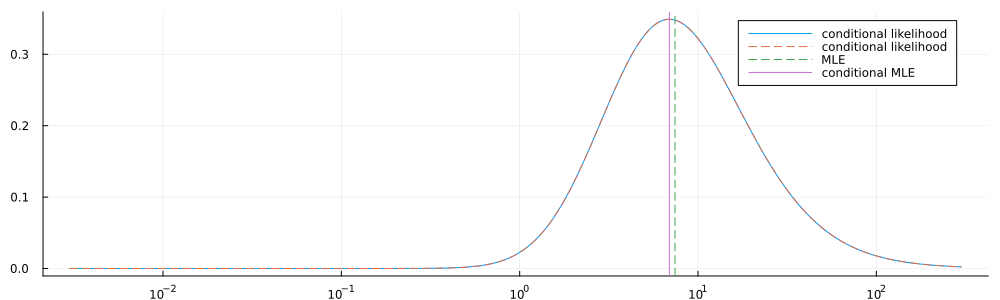

In [66]:
using Distributions
using Optim
using StatsFuns
using SpecialFunctions
using Plots
default(fmt=:png)

logf(x) = logabsgamma(x+1)[1]
logPtilde(m, n, s, a, logω) = a*logω - logf(a) - logf(m-a) - logf(s-a) - logf(n-s+a)
logZ(m, n, s, logω) = logsumexp(logPtilde(m, n, s, a, logω) for a in max(0, s-n):min(m, s))
P(m, n, s, a, ω) = exp(logPtilde(m, n, s, a, log(ω)) - logZ(m, n, s, log(ω)))

m, n, s, a = 20, 10, 15, 13
b, c, d = m-a, s-a, n-s+a
@show a, b, c, d
@show ORhat = (a*d) / (b*c)
fnchg(ω) = FisherNoncentralHypergeometric(m, n, s, ω)
P(a, ω) = P(m, n, s, a, ω)

o = optimize(logω -> -P(a, exp(logω)), -10.0, 10.0)
#@show o
@show ORtilde = exp(o.minimizer)
@show phicoeff = (a*d - b*c) / sqrt((a+b)*(c+d)*(a+c)*(b+d))

plot(ω -> pdf(fnchg(ω), a), 0.003, 300; label="conditional likelihood")
plot!(ω -> P(a, ω); label="conditional likelihood", ls=:dash)
vline!([ORhat]; label="MLE", ls=:dash)
vline!([ORtilde]; label="conditional MLE")
plot!(xscale=:log10, size=(1000, 300))

In [32]:
?Hypergeometric

search: Hypergeometric NoncentralHypergeometric Geometric



```
Hypergeometric(s, f, n)
```

A *Hypergeometric distribution* describes the number of successes in `n` draws without replacement from a finite population containing `s` successes and `f` failures.

$$
P(X = k) = {{{s \choose k} {f \choose {n-k}}}\over {s+f \choose n}}, \quad \text{for } k = \max(0, n - f), \ldots, \min(n, s).
$$

```julia
Hypergeometric(s, f, n)  # Hypergeometric distribution for a population with
                         # s successes and f failures, and a sequence of n trials.

params(d)       # Get the parameters, i.e. (s, f, n)
```

External links

  * [Hypergeometric distribution on Wikipedia](http://en.wikipedia.org/wiki/Hypergeometric_distribution)


In [26]:
using SpecialFunctions

rd(x) = round(x; digits=4)
logfact(x) = logabsgamma(x+1)[1]
fact(x) = exp(logfact(x))
logbinom(n, k) = logfact(n) - logfact(k) - logfact(n-k)
binom(n, k) = exp(logbinom(n, k))
ε = √eps()

1/fact(-23)

0.0

In [2]:
binomial(-23, -23)

0

In [28]:
n = -5
for k in -20:0
    @eval @show binom($n+ε, $k+ε) |> rd
end

binom(-5 + ε, -20 + ε) |> rd = 3875.9999
binom(-5 + ε, -19 + ε) |> rd = 3059.9999
binom(-5 + ε, -18 + ε) |> rd = 2380.0
binom(-5 + ε, -17 + ε) |> rd = 1820.0
binom(-5 + ε, -16 + ε) |> rd = 1365.0
binom(-5 + ε, -15 + ε) |> rd = 1001.0
binom(-5 + ε, -14 + ε) |> rd = 715.0
binom(-5 + ε, -13 + ε) |> rd = 495.0
binom(-5 + ε, -12 + ε) |> rd = 330.0
binom(-5 + ε, -11 + ε) |> rd = 210.0
binom(-5 + ε, -10 + ε) |> rd = 126.0
binom(-5 + ε, -9 + ε) |> rd = 70.0
binom(-5 + ε, -8 + ε) |> rd = 35.0
binom(-5 + ε, -7 + ε) |> rd = 15.0
binom(-5 + ε, -6 + ε) |> rd = 5.0
binom(-5 + ε, -5 + ε) |> rd = 1.0
binom(-5 + ε, -4 + ε) |> rd = 0.0
binom(-5 + ε, -3 + ε) |> rd = 0.0
binom(-5 + ε, -2 + ε) |> rd = 0.0
binom(-5 + ε, -1 + ε) |> rd = 0.0
binom(-5 + ε, 0 + ε) |> rd = 0.0


In [6]:
binom(-23+ε, -22+ε)

0.0

In [17]:
binom(-23+ε, -24+ε)

22.999999985098924

In [10]:
binom(-23.1, -23)

0.0

In [11]:
binom(-23.1, -23.1)

1.0

In [12]:
binom(-23.1, 0)

1.0